# Sequence Alignment Algorithm

## 1. Local Sequence Alignment Algorithm

Implement Local Sequence Alignment Algorithm that was studied in class (see first practical session for a reminder)

**Input:**

- Two amino-acid input sequences $S_1, S_2$
- A scoring matrix - can be found in the file *blosum_62.txt*
    - This is BLOSUM62 scroing matrix for proteins  
    The sign '\*' in a row or column represents indels score

**Output:**
- Optimal local alignment of $S_1, S_2$
- Optimal alignment score
- Start and end indices of the local alignment in $S_1$ and $S_2$
- The Dynamic Programming table after the computation is done

For example, local alignment of:  

In [1]:
s1 = 'YVEGLKMF'  
s2 = 'ELGLMBAR'

should return the following output:

In [2]:
print('\n'.join(['E_GLKM','ELGL_M','score = 12','s1 (2, 7)','s2 (0, 5)']))

E_GLKM
ELGL_M
score = 12
s1 (2, 7)
s2 (0, 5)


You don't need to print the dynamic programming table, but keep it for part 2

In this example, the optimal local alignment is between **seq1[2:7]** and **seq2[0:5]** (the last index is not included)

In [3]:
print(s1[2:7])
print(s2[0:5])

EGLKM
ELGLM


Run your algorithm on this example for sanity check

## solution  Question 1


In [4]:
# global vairabels
scoring_matrix = {}
dynamic_prog_table = []

In [5]:
import itertools
import time
import numpy as np

class ComputingMatrix:

    def __init__(self, score_matrix, S1,  S2):
        self.S1 = S1
        self.S2 = S2
        self.score_f = score_matrix

    def _opt(self, opt_matrix, i, j):
        cuss_opt = opt_matrix[i, j] = max([
            opt_matrix[i-1, j] - 4,
            opt_matrix[i, j-1] - 4,
            opt_matrix[i-1, j-1] + self.score_f[self.S1[i-1], self.S2[j-1]],
            0
                ])
        return cuss_opt

    def _feeld_max(self, global_max, global_ind, curr_opt, curr_ind):

        if global_max > curr_opt:
            return global_max, global_ind
        else:
            return curr_opt, curr_ind

    def feel_opt_matrix(self):

        max = 0
        opt_ind = (0, 0)
        opt_matrix = np.zeros([len(self.S1), len(self.S2)])

        for i in range(1, len(self.S1)):
            for j in range(1, len(self.S2)):
                curr_opt = self._opt(opt_matrix, i, j)
                opt_matrix[i, j] = curr_opt
                max, opt_ind = self._feeld_max(max, opt_ind, curr_opt, (i, j))

        return opt_matrix, max, opt_ind[0], opt_ind[1]

    def reconstruction(self, opt_matrix, S1_end, S2_end):

        aling_S1, aling_S2 = "", ""
        S1_bigin, S2_bigin = S1_end, S2_end

        curr_opt = opt_matrix[(S1_bigin, S2_bigin)]

        while curr_opt > 0:

            ops1 = opt_matrix[(S1_bigin - 1, S2_bigin)] + self.score_f[self.S1[S1_bigin], '*']
            ops2 = opt_matrix[(S1_bigin, S2_bigin - 1)] + self.score_f['*', self.S2[S2_bigin]]

            if curr_opt == ops1:
                aling_S1 = self.S1[S1_bigin] + aling_S1
                aling_S2 = '_' + aling_S2
                S1_bigin -= 1
            elif curr_opt == ops2:
                aling_S2 = self.S2[S2_bigin] + aling_S2
                aling_S1 = '_' + aling_S1
                S2_bigin -= 1
            else:
                aling_S1 = self.S1[S1_bigin] + aling_S1
                aling_S2 = self.S2[S2_bigin] + aling_S2
                S1_bigin -= 1
                S2_bigin -= 1
            curr_opt = opt_matrix[(S1_bigin, S2_bigin)]

        return aling_S1, aling_S2, (S1_bigin, S1_end), (S2_bigin, S2_end)


In [6]:
# copy the score matrix to arr
def create_score_arr(matrix_file, first_line, last_line):

    output_arr = []
    with open(matrix_file) as file:

        for line in itertools.islice(file, first_line, last_line):
            output_arr.append(line.split())
        output_arr[0] = ["i\j"] + output_arr[0]

    return output_arr

# receive scores file and create a score df
def create_score_dict(first_line=6, last_line=31, matrix_file="/home/stav/PycharmProjects/tabio-Ass1/blosum_62.txt"):

    raw = create_score_arr(matrix_file, first_line, last_line)

    # create a score dictionary
    output_dict = {}
    for i in range(1, len(raw)):
        for j in range(1, len(raw[0])):
            output_dict[(raw[i][0], raw[0][j])] = int(raw[i][j])

    return output_dict

def local_elingment(S1, S2, scoring_matrix):
    
    comput_matrix = ComputingMatrix(scoring_matrix, S1, S2)
    
    # return the Dynamic Programming table
    # return the optimal alingment score and thr  
    # return the indeces of the local alingment in S1 and S2     
    dynamic_prog_table, optimal_aling_score, S1_end, S2_end = comput_matrix.feel_opt_matrix()
    
    # restoration te local alingment     
    S1_aling, S2_aling, S1_indexeses, S2_indexes = comput_matrix.reconstruction(dynamic_prog_table,
                                                                               S1_end, S2_end)
    return dynamic_prog_table, S1_aling, S2_aling, optimal_aling_score, S1_indexeses, S2_indexes

def print_local_elingment (solution):

    print(solution[1])
    print(solution[2])
    print("score = ", solution[3])
    print("s1 ", solution[4])
    print("s2 ", solution[5])

In [7]:
blosum62_file_path = "./blosum_62.txt"
S1 = 'YVEGLKMF'
S2 = 'ELGLMBAR'

scoring_matrix = create_score_dict(matrix_file=blosum62_file_path)

solution = local_elingment(S1, S2, scoring_matrix)

print_local_elingment(solution)

G_LKMF
LGLM_B
score =  12.0
s1  (2, 7)
s2  (0, 5)


## 2. Running the algorithm and analyzing the results

In this section, you will run your algorithm on the sequences from *seq1.fasta* and *seq2.fasta* files

**Input:**

- **query** protein: The file *seq1.fasta* contains a single protein:  
    The first line starts with '>' and the name of the sequecne.  
    The concatenation of all lines that come after '>' is the sequence itself.

- **database**: The file *seq2.fasta* contains a very long sequence of amino acids, representing a database of proteins (same format as *seq1.fasta*)
- A scoring matrix - can be found in the file blosum_62.txt

> Note: In the Dynamic Programming table, the **query** should be represented by the **rows** and the **database** should be represented by the **columns**

Execute local alignment of the query against the database and **report**:
- Optimal alignment of query and database
- Optimal alignment score
- Start and end indices of the local alignment in **query** and **database**
- Runtime performance

In [8]:
def pars_sequecne(sequecne_file_path):

    with open(sequecne_file_path) as file:
        lines = file.read().split('\n')

    return "".join([line.rstrip() for line in lines[1:]])
  

In [9]:
%%time

seq1 = pars_sequecne("./seq1.fasta")
seq2 = pars_sequecne("./seq2.fasta")

solution = local_elingment(seq1, seq2, scoring_matrix)

dynamic_prog_table = solution[0]

CPU times: user 6min 53s, sys: 6.59 s, total: 7min
Wall time: 7min 1s


In [10]:
print_local_elingment(solution)

VAALLLGAAG_HLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNYIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTITQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDQASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFLRKRQPDGPLGPLYASSNPEYLSASDVFPCSVYVPDEW

## Questions

Answer the 6 questions below:

1. What protein sequence will get the highest possible score when aligned against the **query** (using Local Alignment and the given scoring matrix)? Compute this score.

### Answer:  
**Write your answer here**

The proteins that will get the highest score in a local alignment with query are the proteins that contains the sequence of the gene.

In [11]:
print_local_elingment(local_elingment(seq1, seq1, scoring_matrix))

ATGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNYIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTITQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDQASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFLRKRQPDGPLGPLYASSNPEYLS

2. What is the optimal score of a local alignment between query and database, in comparison to the score computed in (1)? What can you conclude? 

### Answer:  
**Write your answer here**

The difference between the scores of the alignments indicates that the data does not contain query.
Furthermore, there was a 94.06% match in the alignment of the gene and the data so we can conclude there is homology between the two.

3. Plot a heatmap of the dynamic programming table, using [matplotlib.pyplot.imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html), for example:

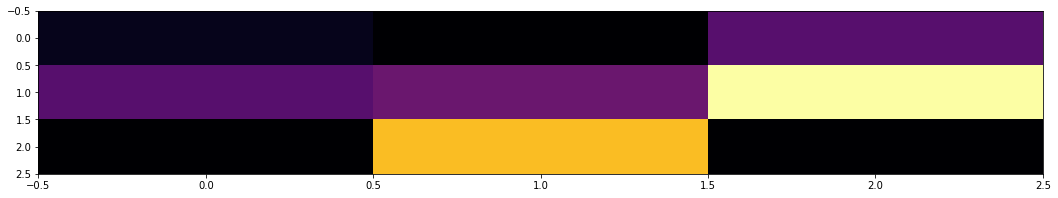

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 

matrix = [[1, 0, 5],
          [5, 6, 20],
          [0, 17, 0]]
plt.figure(figsize=(18,3))
plt.imshow(matrix, aspect='auto', cmap='inferno')

It is recommended you use figure size and color map from this example

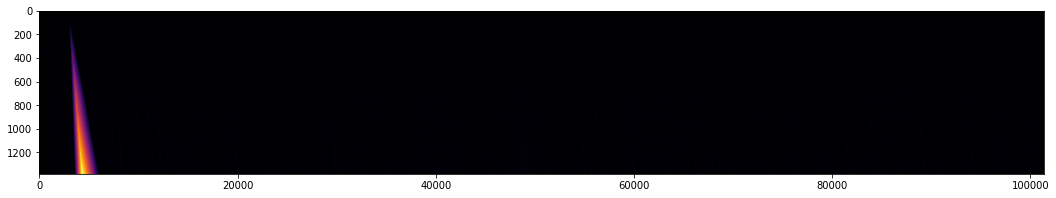

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(18,3))
plt.imshow(dynamic_prog_table, aspect='auto', cmap='inferno')

4. What can you tell from this heatmap about the query and the database?

### Answer:  
**Write your answer here**

It is clear to see that most of the map is black, which indicates that most of the values in the dynamic programming marix are zero. Furthermore, it appears as though the values that does not equal to zero are centered in one place in the matrix, and so this is the area of alignment in the local alignment. For these reasons we will conclude that the parts is the matrix that contains zero values could have been trimmed, thus saving running time in finding the alignment. 

5. Run a [BlastP](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE=Proteins) search (Blast for proteins) using the query. Just copy the sequence into the input box and press on 'BLAST' button. What did you get?
 

### Answer:  
**Write your answer here**

In [14]:
print(seq1)

MATGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNYIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTITQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDQASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFLRKRQPDGPLGPLYASSNPEYL

There was a 100% match between the gene sequence and the data base to which the site is compared to. That is, there is a genome in the database that contains this sequence.

6. Run BlastP on the **database[start:end]** where start is the first index of the optimal alignment and end is the end index of the alignment. What did you get?

### Answer:  
**Write your answer here**

There was a 100% match between sequence 2 and the sequence from the data base also, but for sequence 2 it was stated that the alignment is a "guess". From this we conclude that the database contains a very similar but different sequence from this sequence. In addition to the results of BLAST, it appears as though the two sequences (1 and 2) matches two genes with the same role. Also, according to the scores of the alignments on the previous questions, this two sequences are indeed very similar, so it can be concluded that BLAST found that sequence 2 matches sequence 1 or a similar sequence from the same family of genes.